# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
#from ggplot import *
import seaborn as sbn; sbn.set(color_codes = True)
from scipy import stats as stats
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import sqrt

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\nblack\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


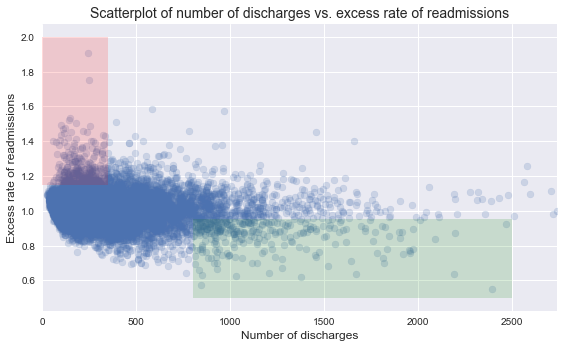

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

### Do you agree with the above analysis and recommendations? Why or why not?

In [5]:
# Shorten names of data frames and remove instances with null values in Excess Readmission Rates
clean_df = clean_hospital_read_df
df = hospital_read_df
clean_df = clean_df[clean_df["Excess Readmission Ratio"].isnull() == False]

In [6]:
# Get the correlation coefficient between number of readmissions and number of discharges
np.corrcoef(clean_df["Number of Readmissions"], clean_df["Number of Discharges"])

array([[ 1.        ,  0.79127241],
       [ 0.79127241,  1.        ]])

In [8]:
# Get the correlation coefficient between Excess Readmission Ratio and Number of Discharges
corr = np.corrcoef(clean_df["Excess Readmission Ratio"], clean_df["Number of Discharges"])
rho = corr[0][1]

In [13]:
# Get the mean Excess Readmission Ratio for hospitals/facilities with > and < 282 discharges
print(np.mean(clean_df["Excess Readmission Ratio"][clean_df["Number of Discharges"] > 282]))
print(np.mean(clean_df["Excess Readmission Ratio"][clean_df["Number of Discharges"] < 282]))

1.00035509599
1.01450516701


In [9]:
# Calculate the proportion of hospitals with readmission ratios over 1.0 for number of discharges > and < than 282
print(sum((clean_df['Excess Readmission Ratio'] > 1.0) & (clean_df["Number of Discharges"] > 282))/float(len(clean_df[clean_df['Number of Discharges']> 282])))
print(sum((clean_df['Excess Readmission Ratio'] > 1.0) & (clean_df["Number of Discharges"] < 282))/float(len(clean_df[clean_df['Number of Discharges']< 282])))

0.494764397906
0.538274182324


In [10]:
# Get the percentage of data that was used in the prelimnary study
(len(clean_df[clean_df["Number of Discharges"] < 100]) + len(clean_df[clean_df["Number of Discharges"] > 1000]))/float(len(clean_df))

0.1436026789597286

The reasons that I do not agree with the preliminary analysis above are as follows:
1. The analysis states that readmissions are trending down, but the correlation coefficient, while negative, is close to 0 (-0.09) which indicates a very weak relationship
2. There is no reason given for the selection of the shaded regions which seems to have been chosen arbitrarily or to support a point that the data does not seem to support.
3. The analysis chose seemingly arbitrary thresholds of < 100 and > 1000 discharges to compare readmissions; thresholds which cut out a little over 85% of the cleaned data
4. A more appropriate threshold might be the median number of discharges (282) below and above which the proportion of hospitals/facilities with readmission rates over 1.0 is 54% and 49% respectively - a much more fair comparison than the 63% and 44% in the analysis
5. The analysis states that there is a significant relationship between readmission rates and number of discharges which is not backed by any hypothesis test conclusions
6. The statement that "Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions" is conjecture as it is not supported by data or test results
7. The recommendation at the end of the analysis that references hospitals with <300 number of discharges which is the first time that threshold is mentioned
8. The recommendation that hospitals should be consolidated is quite a leap as it is not backed by supporting conclusions from the analysis and fails to address other factors which may necessitate smaller hospitals such as access by rural communities

### Setup an appropriate hypothesis test.

Since we are studying the relationship between Excess Readmission Ratios and Number of Discharges, we will perform a hypthesis test for the population correlation coefficient using a t-test with the following hypotheses:

$$ H0: \rho = 0 $$
$$ H1: \rho \neq 0 $$
$$ \alpha = 0.01 $$

### Compute and report the observed significance value (or p-value).

In [11]:
n  = len(clean_df)
t = (rho*sqrt(n-1))/(sqrt(1-rho**2))
pval = stats.t.sf(np.abs(t), n-1)*2
pval

1.2166827991904698e-25

### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The pvalue associated with our t-statistic is less than our alpha threshold which indicates that there is a statistically significant relationship between Readmission Rates and Number of Discharges. However, with a correlation coefficient of approximately -0.09, the relationship is weak and, therefore, not practically significant. My recommendation would be to conduct further analyses to explore other factors that may have a greater effect on readmission rates.

### Look at the scatterplot above.

* What are the advantages and disadvantages of using this plot to convey information?
* Construct another plot that conveys the same information in a more direct manner.

The plot used in the preliminary analysis is misleading as it draws attention to the graph edges and ignores the middle section where the bulk of the data is. The advantages of using a scatterplot in this way is to show the relationship between two continuous variables and the way that this plot was constructed shows the density of data points that overlap. However, there is no indicator for the strength of the relationship between the two variables. The graph below adds the relationship indicator with pearsonr coefficient, adds the univariate distributions,  and does not include any shaded areas:

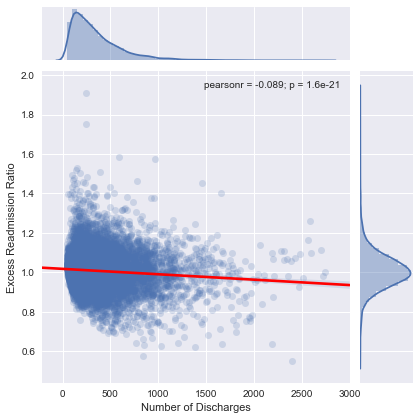

In [14]:
g = sbn.jointplot(x="Number of Discharges", y="Excess Readmission Ratio", data=clean_df[83:-3], kind='reg', scatter_kws = {'alpha':0.2})
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder('5')

